<a href="https://colab.research.google.com/github/saurabh423/Book-Recommendation-System/blob/main/Book_Recommendation_System_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Build a recommender engine that reviews customer ratings and recommend items and improve sales. </u></b>

# <b><u>Problem Statement: </u></b>

####During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


####In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).
####Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

## **About Recommendation Engines**
A recommendation engine, also known as a recommender system, is software that analyzes available data to make suggestions for something that a user might be interested in.

A recommendation engine can be used for recommending other products besides books; for example a recommendation engine can be used to suggest movies or t-shirts or any other product based on things like similar customers who bought similar products. On Amazon’s ecommerce website, you can see an area populated by a recommendation engine, it’s the area that you see “Customers who viewed this item also viewed” and “Customers who bought this item also bought” lists.

A recommendation system is usually built using 3 techniques which are **content-based filtering, collaborative filtering, and a combination of both**.

* **Content-based filtering**: 
The algorithm recommends a product that is similar to those which used as watched. In simple words, In this algorithm, we try to find finding item look alike. For example, a person likes to watch Sachin Tendulkar shots, so he may like watching Ricky Ponting shots too because the two videos have similar tags and similar categories.
Only it looks similar between the content and does not focus more on the person who is watching this. Only it recommends the product which has the highest score based on past preferences.

* **Collaborative filtering:**
Collaborative based filtering recommender systems are based on past interactions of users and target items.  In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user.
Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it.

* **Hybrid Filtering Method:**
It is basically a combination of both the above methods. It is a too complex model which recommends product based on your history as well based on similar users like you.
There are some organizations that use this method like Facebook which shows news which is important for you and for others also in your network and the same is used by Linkedin too.


###In this project, we will use the **Collaborative based filtering** method to build a book recommender system.

##**Dataset Description**
The Book-Crossing dataset comprises 3 files which contains 1.1 million ratings of 270,000 books by 90,000 users. The ratings are on a scale from 1 to 10.

* **Users**
Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
*  **Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.
*  **Ratings**
Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

####**Importing Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import scipy
import math
import random
import sklearn

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Reading Data**

In [4]:
#Reading Users data
users = pd.read_csv("/content/drive/MyDrive/Almabetter/Module 4: Machine Learning/Capstone Project 4: Product Recommendation Engine/dat/Users.csv")
#Reading Books data
books = pd.read_csv("/content/drive/MyDrive/Almabetter/Module 4: Machine Learning/Capstone Project 4: Product Recommendation Engine/dat/Books.csv")
#Reading Ratings data
ratings = pd.read_csv("/content/drive/MyDrive/Almabetter/Module 4: Machine Learning/Capstone Project 4: Product Recommendation Engine/dat/Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#checking shapes of the datasets
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


Let's see the head of each dataframe.

In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The dataset is reliable and can consider as a large dataset. we have 271360 books data and total registered users on the website are approximately 278858 and they have given near about 11 lakh rating. hence we can say that the dataset we have is nice and reliable.

## **Data Preprocessing and Basic EDA**

First, we will rename the columns of each file. Because the name of the column contains space, and uppercase letters so we will correct as to make it easy to use.

In [9]:
# Renaming column name of 'books', 'users' & 'ratings' dataset
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)

###Exploring books dataset

In [10]:
#Printing Top 5 rows of book data
books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Now in the books dataset, we have some extra columns which are not required for our task like Image-URL-S, Image-URL-M and Image-URL-L.



In [11]:
#dropping last three columns containing image URLs which will not be required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [12]:
#Now the books datasets looks like...
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [13]:
#Checking data types of columns
print(books.dtypes)

ISBN         object
title        object
author       object
year         object
publisher    object
dtype: object


In [14]:
#making this setting to display full text in columns
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [15]:
#Get the unique values of Year-Of-Publication	
books.year.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from below that there are some incorrect entries in this field. It looks like Publisher names '**DK Publishing Inc**' and '**Gallimard**' have been incorrectly loaded as year in dataset due to some errors in csv file. Also some of the entries are strings and same years have been entered as numbers in some places.

In [16]:
#Checking the rows having 'DK Publishing Inc' and 'Gallimard' as year
books.loc[(books.year == 'DK Publishing Inc') |( books.year == 'Gallimard'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


From above dataframe we can see that there has been a shift in the values of this three rows. 

Let's bring them in the right place.

In [17]:
#From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','year'] = 2000
books.loc[books.ISBN == '0789466953','author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [18]:
#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','year'] = 2000
books.loc[books.ISBN == '078946697X','author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [19]:
#ISBN '2070426769'
books.loc[books.ISBN == '2070426769','year'] = 2003
books.loc[books.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [20]:
#Rechecking
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769'),:]

,ISBN,title,author,year,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc


In [21]:
# Correcting the dtypes of year
books.year = pd.to_numeric(books.year, errors='coerce')

In [22]:
#Checking dtype
books.year.dtype

dtype('int64')

In [23]:
# Printing unique sorted years of books
print(sorted(books['year'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


Now, it can be seen that "year" has all values as integers.

In [24]:
# Since, the value 0 is invalid 
# setting '0' years as NaN
books.loc[(books.year == 0),'year'] = np.NAN

**Missing Value Analysis** 

 Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [25]:
# checking for missing values
books.isnull().sum()

ISBN         0   
title        0   
author       1   
year         4618
publisher    2   
dtype: int64

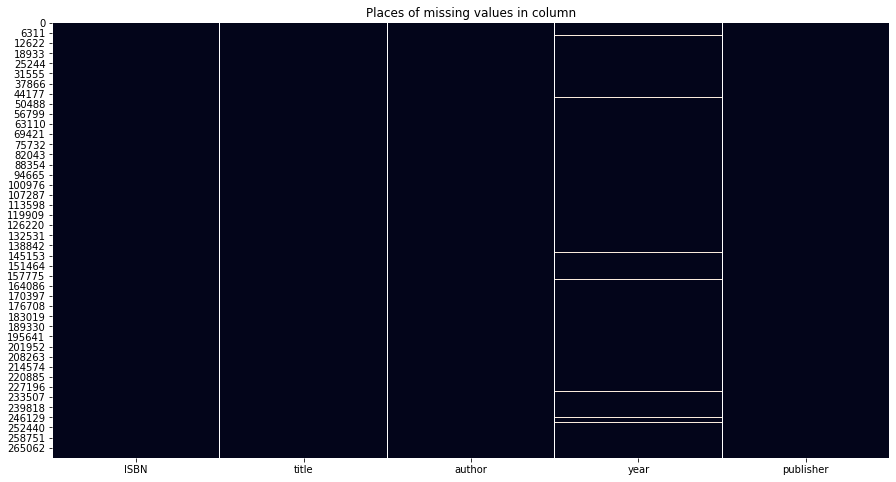

In [26]:
# Let's visualize the location of missing values
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(books.isnull(), cbar=False, ax=ax)

Here, we can see above that year column have **4618** missing values.

In [27]:
#Replacing NaNs with mean value of year feature
books.year.fillna(round(books.year.mean()), inplace=True)

In [28]:
#rechecking
books.year.isnull().sum()
#No Nan values

0

In [29]:
#Resetting the dtype as int32
books.year = books.year.astype(np.int64)

In [30]:
#exploring 'publisher' column
books.loc[books.publisher.isnull(),:]

,ISBN,title,author,year,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In publisher column we've two missing values.

Here, we replace these nan's with '**other**'

In [31]:
#Replacing missing values with 'other'
books.loc[(books.ISBN == '193169656X'),'publisher'] = 'other'
books.loc[(books.ISBN == '1931696993'),'publisher'] = 'other'

In [32]:
#Checking for the missing value
print(books['publisher'].isnull().sum())

0


In [33]:
# Excluding the missing values in 'author' column 
books.dropna(axis=0,inplace=True)

In [34]:
# Now checking for missing values
books.isnull().any()

ISBN         False
title        False
author       False
year         False
publisher    False
dtype: bool

In [35]:
#Print a concise summary of a DataFrame
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271359 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271359 non-null  object
 1   title      271359 non-null  object
 2   author     271359 non-null  object
 3   year       271359 non-null  int64 
 4   publisher  271359 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


In [36]:
# Checking for any duplicate values 
len(books[books.duplicated()])
# No duplicate

0

###Exploring Users dataset

In [37]:
#Printing Top 5 rows 
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [38]:
# getting info about user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [39]:
# Checking unique values of user_id
users.user_id.unique()
#it can be seen that these are unique

array([     1,      2,      3, ..., 278856, 278857, 278858])

**Missing value analysis**

In [40]:
# checking for missing values
users.isnull().sum()

user_id     0     
location    0     
age         110762
dtype: int64

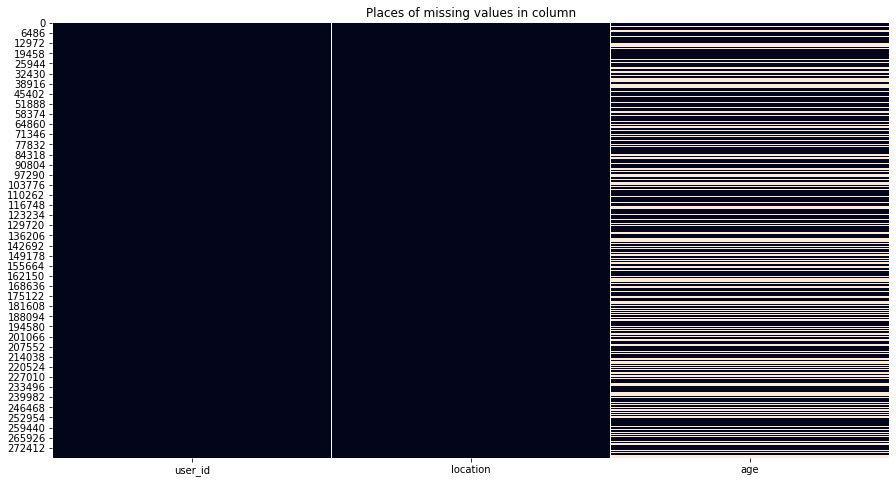

In [41]:
# Let's visualize the location of missing values
fig, ax = plt.subplots(figsize=(15,8))
plt.title('Places of missing values in column')
sns.heatmap(users.isnull(), cbar=False, ax=ax)

It can be observed that only **age** column have missing values.



In [42]:
# percentage of missing data per category
total = users.isnull().sum().sort_values(ascending=False)
percent_total = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
age,110762,39.719857


In [43]:
# Getting unique age values in sorted manner
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above.

In my view values below **5** and above **90** do not make much sense for our book rating case...hence replacing these by NaNs.


In [44]:
# Replacing age below 5 and above 90 by NaNs
users.loc[(users.age > 90) | (users.age < 5), 'age'] = np.nan

In [45]:
#Now, Replacing NaNs with mean
users['age'].fillna((users['age'].mean()), inplace=True)

In [46]:
#setting the data type as int
users.age = users.age.astype(np.int64)

In [47]:
# Users dataset information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   278858 non-null  int64 
 1   location  278858 non-null  object
 2   age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [48]:
# Checking for any duplicate values 
len(users[users.duplicated()])
# No duplicate

0

###Exploring Ratings Dataset

In [49]:
# Printing top 5 rows
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Let's see how many users have given ratings and extracting those users who have given more than 200 ratings.

In [50]:
# Value counts of user_id
ratings['user_id'].value_counts()

11676     13602
198711    7550 
153662    6109 
98391     5891 
35859     5850 
          ...  
158698    1    
17920     1    
277135    1    
275086    1    
187812    1    
Name: user_id, Length: 105283, dtype: int64

In [51]:
#Getting unique values 
ratings.rating.unique()
#it can be seen that these are unique and has range between 0-10

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [52]:
# checking for missing values
ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In ratings dataset we don't have any missing value.

Now, We'll only take the **ISBNs** that also belongs to the main **books** set.

In [53]:
unique_ratings = ratings[ratings.ISBN.isin(books.ISBN)]

Ratings dataset should have ratings from users which exist in users dataset, unless new users or book are added to users dataset

In [54]:
# # Creating dataframe which contains books that are only in books dataset
ratings = ratings[ratings.user_id.isin(users.user_id)]

In [55]:
# Printing shapes
print(ratings.shape)
print(unique_ratings.shape)
print(books.shape)
print(users.shape)

(1149780, 3)
(1031135, 3)
(271359, 5)
(278858, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off.

# **Visualization**

Let's now make some pretty plots to visualize our data.

The age distribution of the Users

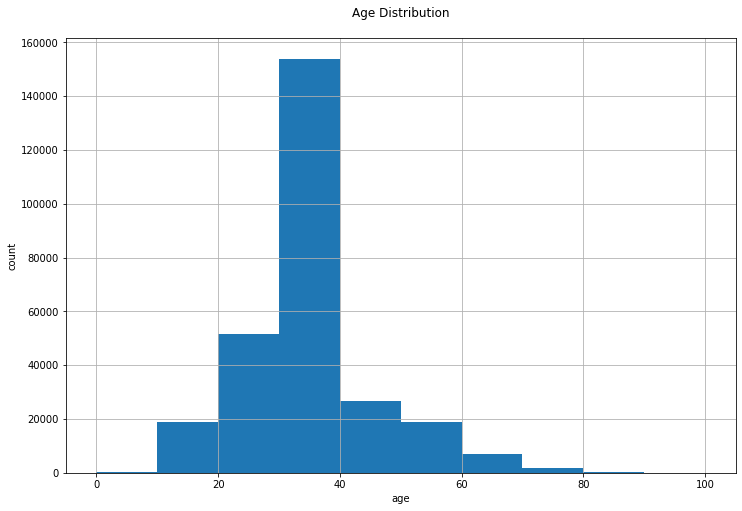

In [56]:
#Plot histogram to see the distribution of the data
fig = plt.figure(figsize = (12,8))
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


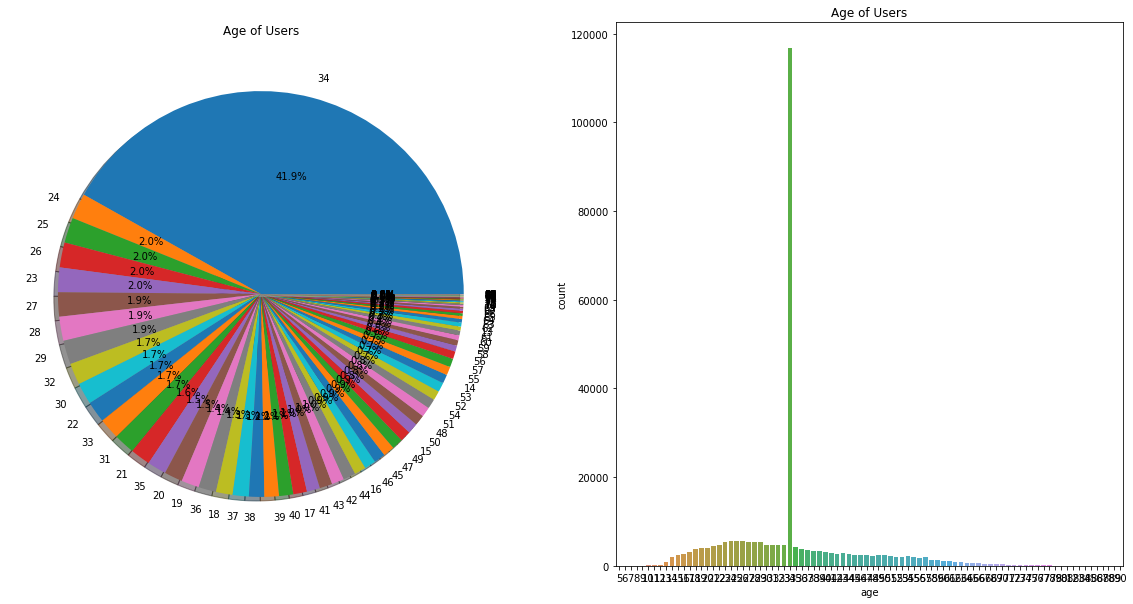

In [57]:
#Plotting pie chart of age variable
f,ax=plt.subplots(1,2,figsize=(20,10))
users.age.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Age of Users')
ax[0].set_ylabel('')

#Plotting countplot of age variable
sns.countplot('age',data=users,ax=ax[1])
ax[1].set_title('Age of Users')
plt.show()

From above plots we observed that 41.9% of age 34 group read more books compared to other age groups.

Also the users with the age 60 and above do not read more books.  

Let's see which rating people tend to give more :

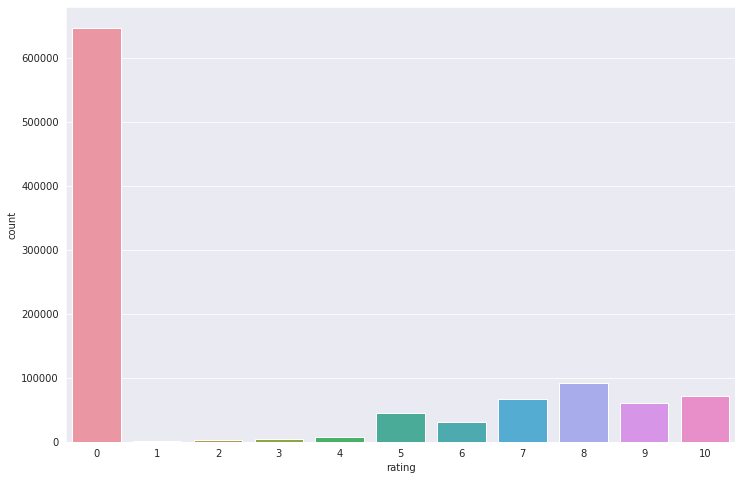

In [58]:
# Plotting counplot of ratings
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= unique_ratings , x='rating')
plt.show()

This countplot shows users have rated 0 the most, which can mean they haven't rated boks at all. 

Now we have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [59]:
# Separating ratings
ratings_explicit= unique_ratings[unique_ratings['rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['rating'] == 0]

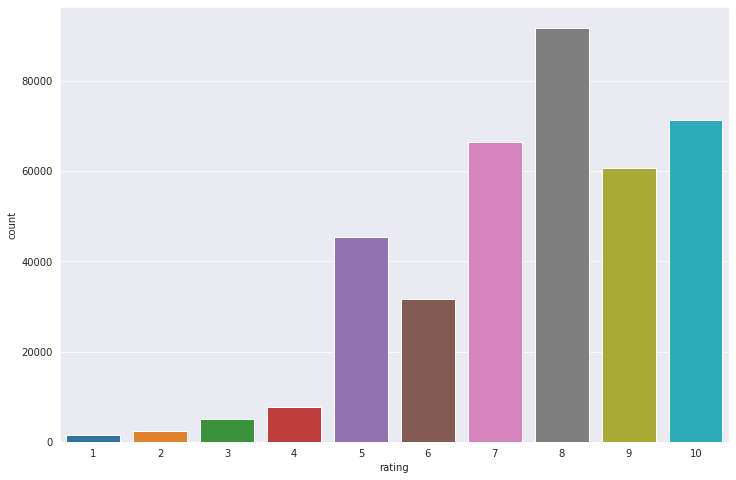

In [60]:
# Now plotting countplot of rating_explicit
fig = plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='rating')
plt.show()

Now, This countplot of rating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times then 10 & 7.


As the problem of string 'year' values was solved in the preprocessing steps, so now there's no need to convert the data types.

Plotted this interactive plot to see more accurately the 'year_of _publication'(year column) distribution.

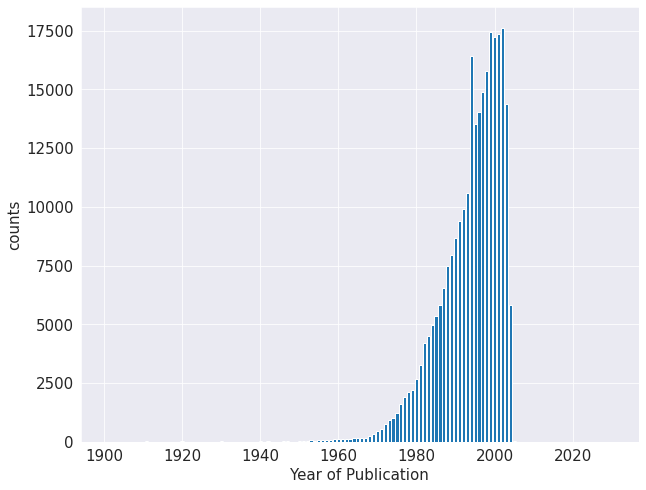

In [61]:
# Plotting bar plot
years = books.year.value_counts().sort_index()
years = years.where(years>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(years.index, years.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can observe that publication years are somewhat between **1950 - 2005** here.

# **Popularity Based Recommendation**

Now let's try to build our first recommendation system based on popularity.  These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.


In [62]:
#Top 5 rows of ratings_explicit
ratings_explicit.head()

,user_id,ISBN,rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [63]:
# Print shapes of unique_ratings and ratings_explicit
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031135, 3)
(383841, 3)


We'll only consider **ISBNs** that were explicitely rated for this recommendation system.

In [64]:
# Merging ratings_explicit with books dataset on ISBNs feature
new_book= pd.merge(books, ratings_explicit, on='ISBN')
new_book.head()

,ISBN,title,author,year,publisher,user_id,rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [65]:
print(new_book.shape) # get shape

(383841, 7)


In [66]:
# Grouping group data based on title and aggregate based on rating
top_ten_books= pd.DataFrame(new_book.groupby('title')['rating'].count().sort_values(ascending=False).head(10))

In [67]:
# Printing top ten books 
print('The top ten books recommendations are : ')
top_ten_books

The top ten books recommendations are : 


,rating
title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


So our book recommendations are ready by using popularity based recommendation.

In [68]:
top_ten_books.reset_index()

,title,rating
0,The Lovely Bones: A Novel,707
1,Wild Animus,581
2,The Da Vinci Code,494
3,The Secret Life of Bees,406
4,The Nanny Diaries: A Novel,393
5,The Red Tent (Bestselling Backlist),383
6,Bridget Jones's Diary,377
7,A Painted House,366
8,Life of Pi,336
9,Harry Potter and the Chamber of Secrets (Book 2),326


# **Collaborative Filtering Using KNN ( k-Nearest Neighbors)**

**kNN(k-Nearest Neighbors)** is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix, with the matrix having one row for each item (book) and one column for each user.

**NOTE:** Reducing the dataset size,we have created another dataframe bookrating which contains users who have rated atleast 100 books and Books which have atleast 100 no of ratings.

In [69]:
count_id = new_book['user_id'].value_counts()  #returns count of occurence of each user ID...thus we get count of users
count_rate = new_book['title'].value_counts()
bookrating = new_book[new_book['user_id'].isin(count_id[count_id>=100].index)]  #count>100
bookrating = bookrating[bookrating['title'].isin(count_rate[count_rate>=100].index)]
#considering users who have rated atleast (min) 100 books and books which have at least 100 ratings.


In [70]:
# Now we can see that we've reducedthe size  
bookrating.shape

(5102, 7)

In [71]:
# Print a concise summary of a DataFrame
bookrating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 17 to 381546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ISBN       5102 non-null   object
 1   title      5102 non-null   object
 2   author     5102 non-null   object
 3   year       5102 non-null   int64 
 4   publisher  5102 non-null   object
 5   user_id    5102 non-null   int64 
 6   rating     5102 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 318.9+ KB


In [72]:
# importing library
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [73]:
# Creating pivot table
book_matrix_new=bookrating.pivot_table(index='title',values='rating',columns='user_id')
# Returning top 5 rows
book_matrix_new.head()

user_id,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,26544,28591,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,6.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Filling Nan values to 0
book_matrix_new=book_matrix_new.fillna(0) 

In [75]:
# Return the first 5 rows
book_matrix_new.head()

user_id,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,26544,28591,...,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# Creating sparse metrix
book_matrix_matrix= csr_matrix(book_matrix_new.values)  #csr is compressed sparse matrix since there are lots of NAn-->0

In [77]:
book_matrix_matrix  #this sparse matrix created only for fitting into the model

<200x421 sparse matrix of type '<class 'numpy.float64'>'
	with 4954 stored elements in Compressed Sparse Row format>

In [78]:
# Building Knn model 
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')  # metric used for evaluation is cosine
model_knn.fit(book_matrix_matrix)  #fitting model with matrix

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [79]:
#Generating random book indices out of the book_matrix
random_index = np.random.choice(book_matrix_new.shape[0])  
print("Random chosen index is:",random_index)
#Applying kneighbours to fitted model
distances, indices = model_knn.kneighbors(book_matrix_new.iloc[random_index,:].values.reshape(1, -1), n_neighbors = 6)

Random chosen index is: 11


In [80]:
book_matrix_new.index[random_index]

'A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail)'

In [81]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_matrix_new.index[random_index]))  #printing our random indexed Title of Book
    else:
        print('{0}) {1} --- having distance of {2}:'.format(i, book_matrix_new.index[indices.flatten()[i]], distances.flatten()[i]))
        #using .format

Recommendations for A Walk in the Woods: Rediscovering America on the Appalachian Trail (Official Guides to the Appalachian Trail):

1) Digital Fortress : A Thriller --- having distance of 0.6965063383446494:
2) Angels &amp; Demons --- having distance of 0.7050764655424302:
3) Naked --- having distance of 0.7516189166804539:
4) The No. 1 Ladies' Detective Agency (Today Show Book Club #8) --- having distance of 0.7620147721642525:
5) Deception Point --- having distance of 0.7646102228091846:


# **SVD(Singular Value Decomposition) Based recommendation System**

The **SVD(Singular Value Decomposition)** is used as a collaborative filtering technique. It uses a matrix structure where each row represents a user, and each column represents an item. The elements of this matrix are the ratings that are given to items by users.

In [83]:
#Installing surprise
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 50 kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617765 sha256=ed55a4128472058ee18f8a8121f9181908c1a1a44f237d9e7a9c1177736a2f2b
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


**Surprise** is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

The name **SurPRISE** (roughly) stands for Simple Python RecommendatIon System Engine.

In [84]:
from surprise import Reader, Dataset

# Creating a 'Reader' object to set the limit of the ratings 

reader = Reader(rating_scale=(1, 10))
# Loading our ratings_explicit data
data = Dataset.load_from_df(ratings_explicit, reader)

In [85]:
from surprise import SVD, model_selection, accuracy
# Using the famous SVD algorithm
model = SVD()

# Train on books dataset
# Runing 5-fold cross-validation and print results
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6353  1.6370  1.6404  1.6360  1.6333  1.6364  0.0023  
Fit time          21.40   21.54   21.67   21.52   21.64   21.55   0.09    
Test time         1.06    1.00    0.76    0.72    1.05    0.92    0.15    
CPU times: user 2min, sys: 706 ms, total: 2min 1s
Wall time: 2min 1s


{'fit_time': (21.402259588241577,
  21.538188457489014,
  21.670710563659668,
  21.52310013771057,
  21.63633418083191),
 'test_rmse': array([1.63531439, 1.63702178, 1.64040963, 1.63604537, 1.63329128]),
 'test_time': (1.0631752014160156,
  1.001549243927002,
  0.7602839469909668,
  0.7181289196014404,
  1.0484533309936523)}

**Train - Test Split**

In [93]:
# train test split on our data
trainset, testset = model_selection.train_test_split(data, test_size=0.2)
# creating svd model
model = SVD()
# Fit the model
model.fit(trainset)
# Predict the model on test data
predictions = model.test(testset)
# Evaluating model
accuracy.rmse(predictions)

RMSE: 1.6378


1.6377738115223182

We see the RMSE score has improved a lot. It is now on average 1.64 which is pretty good.

**Testing Results**

In [94]:
# Taking an arbitrary user-id and item-id to test our model.
uid = 276744  
iid = '038550120X'
pred = model.predict(uid, iid, verbose=True)

user: 276744     item: 038550120X r_ui = None   est = 7.11   {'was_impossible': False}


In [95]:
print(f'The estimated rating for the book with ISBN code {pred.iid} from user #{pred.uid} is {pred.est:.2f}.\n')
actual_rating= ratings_explicit[(ratings_explicit.user_id==pred.uid) & 
                             (ratings_explicit.ISBN==pred.iid)].rating.values[0]
print(f'The real rating given for this was {actual_rating:.2f}.')

The estimated rating for the book with ISBN code 038550120X from user #276744 is 7.11.

The real rating given for this was 7.00.


In [96]:
# The following function was adapted from the surprise docs
# and can be used to get the top book recommendations for each user.
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
        
    return top_n

In [97]:
# Predicting modelon testset
pred = model.test(testset)
# top-N recommendation for each user from a set of predictions
top_n = get_top_n(pred)

In [91]:
def get_reading_list(userid):
    """
    Retrieve full book titles from full 'books_users_ratings' dataframe
    """
    reading_list = defaultdict(list)
    top_n = get_top_n(pred, n=10)
    for n in top_n[userid]:
        book, rating = n
        title_ = new_book.loc[new_book.ISBN==book].title.unique()[0]
        reading_list[title_] = rating
    return reading_list

In [98]:
# Just picking a random user_id=116866
example_reading_list = get_reading_list(userid = 116866)
for book, rating in example_reading_list.items():
    print(f'{book}: {rating}')

Attack Of The Deranged Mutant Killer Snow Goons: 9.260325420171716
Climbing Mount Improbable: 8.070103748567732
The Moons of Jupiter: 7.871006062294324
The Biosphere.: 7.871006062294324
Statistical Process Control: Theory and Practice: 7.871006062294324
Death With Reservations (Pennyfoot Hotel Mystery Series , No 10): 7.871006062294324
Deep Time: How Humanity Communicates Across Millennia: 7.871006062294324
Discrete Multivariate Analysis: Theory and Practice: 7.871006062294324
Spanish Lessons : Beginning a New Life in Spain: 7.797016843828088
The Progress of Love (King Penguin): 7.548813521323188


Above recommended books seems pretty much related.

So our first recommender engine is finished.

# **Conclusion:**

*   While performing Explonatory Data Analysis we observed that almost **42%** of readers with **age-34** read more books compared to other age group of readers.

*   Books with publication years are somewhat between **1950 - 2005**.

*   Also the readers mostly give 8 ratings(on scale 1-10) to books followed by 10 and 7.  

*   The best collaborative book recommender model is **SVD(Singular value decompostion)** with best accuracy on test data which give stronger recommendations.


